In [293]:
%pylab inline

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns
%matplotlib inline

# -*- coding: utf-8 -*-

Populating the interactive namespace from numpy and matplotlib


In [294]:
#lecture du fichier honoraires trouvé sur AMELI

path = "data2014/Honoraires2014.xls"
data = pd.read_excel(path, sheetname=[1, 2, 3, 4, 5, 6])

# tab des spécialistes
df = data[2]
# enlever les nan
df = df.replace('nc', np.nan).dropna()
#on enlève les Totals ça ne sert à rien
df = df[df['DEPARTEMENT'].str.contains('TOTAL')==False]
df = df[df['Spécialistes'].str.contains('TOTAL')==False]
 
df = df[df['DEPARTEMENT'].str.contains('- ')]
df = df[df['Spécialistes'].str.contains('- ')]

df= df[df['EFFECTIFS'] > 0]
df['DEPASSEMENTS (Euros)'] = df['DEPASSEMENTS (Euros)'].astype('float')

#dep = pd.DataFrame([[x] + x.split('- ') for x in df['DEPARTEMENT']], columns=['DEPARTEMENT', 'num_dep', 'nom_dep'])

#spec = pd.DataFrame([[x] + x.split('- ') for x in df['Spécialistes']],columns=['Spécialistes', 'num_spec', 'nom_spec'])

#df = pd.concat([df, dep, spec], axis=1, join='inner')


df_clean = df.drop(['HONORAIRES SANS DEPASSEMENT (Euros)','FRAIS DE DEPLACEMENT (Euros)',
                        'TOTAL DES HONORAIRES (Euros)', 'EFFECTIFS' ], axis =1)

df_honoraire = df_clean[['Spécialistes', 'DEPARTEMENT','DEPASSEMENTS (Euros)']]
df_honoraire = df_honoraire.pivot('DEPARTEMENT','Spécialistes', 'DEPASSEMENTS (Euros)')
df_honoraire['MoyenneDepassement']=np.mean(df_honoraire, axis =1)



In [295]:
df_maxhono = df_honoraire.sort(['MoyenneDepassement'], ascending=False).ix[0:10]    
df_maxhono

/Users/mahzad.kalantari/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Spécialistes,02- Anesthésie-réanimation chirurgicale,03- Pathologie cardio-vasculaire,04- Chirurgie générale,05- Dermato-vénéréologie,06- Radiodiagnostic et imagerie médicale,07- Gynécologie obstétrique,08- Gastro-entérologie et hépatologie,09- Médecine interne,10- Neurochirurgie,11- Oto-rhino-laryngologie,...,47- Chirurgie thoracique et cardio-vasculaire,48- Chirurgie vasculaire,49- Chirurgie viscérale et digestive,70- Gynécologie médicale,72- Médecine nucléaire,73- Oncologie médicale,74- Oncologie radiothérapique,76- Radiothérapie,79- Gynécologie obstétrique et gynécologie médicale,MoyenneDepassement
DEPARTEMENT,,,,,,,,,,,,,,,,,,,,,
75- Paris (Ville),35266190.0,13445640.0,19599498.0,22994499.0,61972743.0,49862309.0,12452458.0,4790684.0,3891945.0,19164809.0,...,798387.0,3223184.0,5209908.0,15356527.0,NaN,432669.0,NaN,NaN,3109799.0,1.664164e+07
69- Rhône,38288693.0,5567008.0,8244648.0,5350913.0,9489952.0,16965331.0,7854979.0,637701.0,2169995.0,4845781.0,...,NaN,3934600.0,3927864.0,3096298.0,1157.0,NaN,NaN,NaN,NaN,6.738207e+06
92- Hauts-de-Seine,19356827.0,5505617.0,4760330.0,7333057.0,18019838.0,11266717.0,4826265.0,849242.0,NaN,7929186.0,...,NaN,NaN,NaN,3310752.0,580977.0,815744.0,4373723.0,825237.0,1063146.0,5.066040e+06
78- Yvelines,6034954.0,2676090.0,4219868.0,5473540.0,9778239.0,14530526.0,2022903.0,NaN,NaN,4871911.0,...,NaN,NaN,NaN,2815079.0,NaN,NaN,NaN,NaN,NaN,4.875693e+06
06- Alpes-Maritimes,10241366.0,2066192.0,5082856.0,3397768.0,1293072.0,11201656.0,2211762.0,468468.0,NaN,3556747.0,...,NaN,896797.0,1297365.0,1903399.0,NaN,NaN,NaN,NaN,NaN,3.388578e+06
94- Val-de-Marne,4822849.0,983708.0,1230242.0,3055528.0,7316462.0,5597932.0,1637924.0,NaN,NaN,3048778.0,...,NaN,NaN,NaN,2023180.0,NaN,NaN,NaN,NaN,3275369.0,3.059298e+06
67- Bas-Rhin,8954144.0,1219961.0,4391568.0,2399194.0,228664.0,6926410.0,2015794.0,NaN,NaN,2610018.0,...,NaN,NaN,1158224.0,NaN,NaN,NaN,NaN,NaN,NaN,2.928716e+06
33- Gironde,12994819.0,2236621.0,3523405.0,1376089.0,1491262.0,5463571.0,2340234.0,NaN,NaN,3528266.0,...,292454.0,712129.0,1374148.0,1584585.0,NaN,NaN,NaN,NaN,NaN,2.869800e+06
91- Essonne,3328589.0,692003.0,2571746.0,2575543.0,10631764.0,6492431.0,1202040.0,NaN,NaN,2340879.0,...,NaN,NaN,NaN,1539676.0,NaN,NaN,NaN,NaN,NaN,2.659777e+06


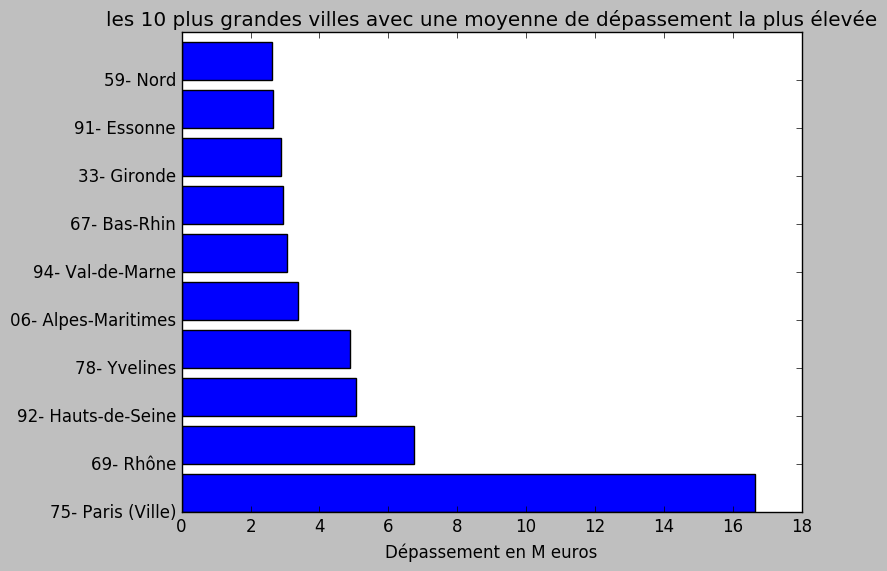

In [404]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


dep = ('75- Paris (Ville)', '69- Rhône', '92- Hauts-de-Seine', '78- Yvelines',
        '06- Alpes-Maritimes', '94- Val-de-Marne', '67- Bas-Rhin',
        '33- Gironde', '91- Essonne', '59- Nord')

y_pos = np.arange(len(dep))

Depassement =[df_maxhono['MoyenneDepassement'][x]/1000000 for x in range(10)]
plt.barh(y_pos,Depassement)
plt.yticks(y_pos, dep)
plt.xlabel('Dépassement en M euros')
plt.title('les 10 plus grandes villes avec une moyenne de dépassement la plus élevée')

plt.show()



In [405]:
#Fichier Densité

path = "data2014/densite2014.csv"
df = pd.read_csv(path,encoding='latin9', skiprows=[0, 1, 2, 3, 5])

#on enlève les Totals ça ne sert à rien

df = df[df['SPECIALITE'].str.contains('- ')]



In [406]:
df_densite = df.sort(['Ensemble des spécialités d\'exercice'], ascending=False)


/Users/mahzad.kalantari/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [407]:
resultat_dens = df_densite.iloc[:10]


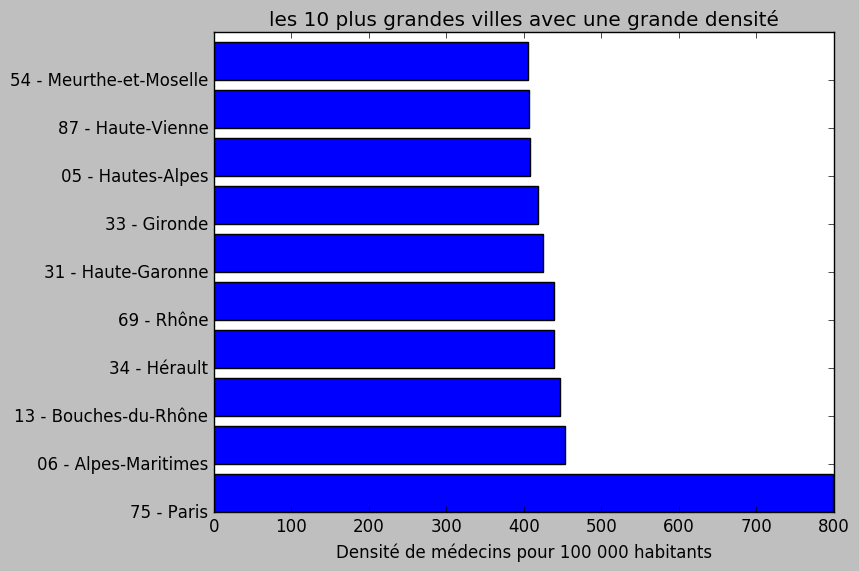

In [408]:

dep_temp = df_densite.iloc[:10]['SPECIALITE']
dep2 = [dep_temp.iloc[x] for x in range(10)]

y_pos2 = np.arange(len(dep))
densité_temp = df_densite.iloc[:10]['Ensemble des spécialités d\'exercice']
densité = [densité_temp .iloc[x] for x in range(10)]

plt.barh(y_pos2,densité)
plt.yticks(y_pos2, dep2)
plt.xlabel('Densité de médecins pour 100 000 habitants')
plt.title('les 10 plus grandes villes avec une grande densité')

plt.show()


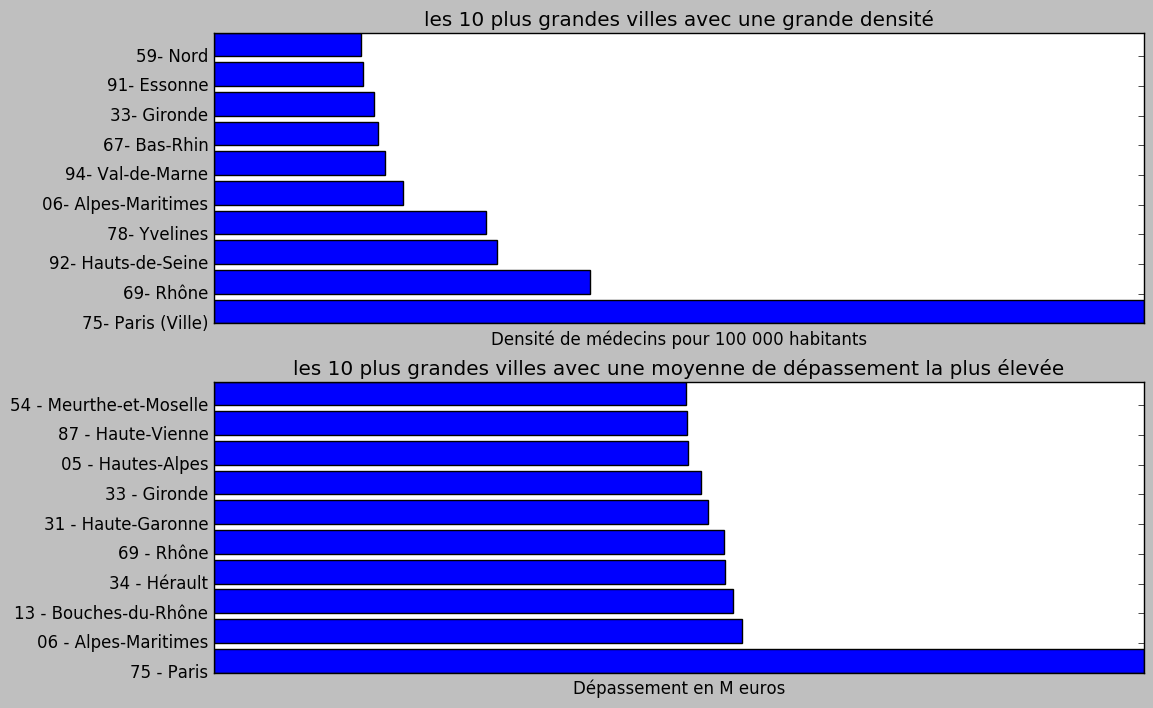

In [415]:
# Densité via dépassement d'honoraire
from pylab import *

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
                         
subplot(2,1,1)
xticks([]), yticks([])
plt.barh(y_pos,Depassement)
plt.yticks(y_pos, dep)
plt.xlabel('Densité de médecins pour 100 000 habitants')
plt.title('les 10 plus grandes villes avec une grande densité')

subplot(2,1,2)
xticks([]), yticks([])
plt.barh(y_pos2,densité)
plt.yticks(y_pos2, dep2)
plt.xlabel('Dépassement en M euros')
plt.title('les 10 plus grandes villes avec une moyenne de dépassement la plus élevée')

plt.show()
# plt.savefig('../figures/subplot-horizontal.png', dpi=64)
show()                 

